In [1]:
!pip install -U gdown

In [11]:
!python -m gdown --id 1twCMJIBmY9P32Yb_nTiGlLDcDrJq8Vds -O final_data.zip

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1twCMJIBmY9P32Yb_nTiGlLDcDrJq8Vds

but Gdown can't. Please check connections and permissions.


In [3]:
!unzip final_data.zip

unzip:  cannot find or open final_data.zip, final_data.zip.zip or final_data.zip.ZIP.


In [4]:
!rm -rf "final_data.zip"

In [5]:
!rm -rf "content/drive/MyDrive/amiya_dataset/Egyptian (1)"

In [6]:
!rm -rf content/drive/MyDrive/amiya_dataset/"Copy of"*

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# SauDial: Saudi Arabic Dialects Game Localization Dataset

Dataset description:
- 1,001 lines of different Saudi dialects (Hejazi, Najdi, Eastern, Southern) in English, MSA, and labelled dialects.
- The dataset contains different topics used for gaming localization (Dhow building simulator, smart traffic, Red Sea coral restoration..)
- Dataset contains age rating to match the appropriate age range for the game. It also contains notes on the cultural context and dialect words


In [12]:
saudial_df = pd.read_excel("/content/drive/MyDrive/Datasets/Saudi/SauDial/SauDial Dataset.xlsx")

saudial_df.head()

,Dialect,Scenario,Game Type,Tone,Age Rating,English Text,Modern Standard Arabic (MSA) Translation,Dialect Translation,Context and Rating,Dialect Notes,Localization Difficulty,In-Game Context
0,Najdi,Holographic Desert Racing,Action,Excited,12+,"""Rev up your engines! Today's race takes you t...","""شغلوا محركاتكم! سباق اليوم يأخذكم عبر طرق الت...","""قوّوا مكاينكم! سباق اليوم بياخذكم على دروب ال...",This dialogue combines traditional settings wi...,"""بياخذكم"" is used for ""takes you"", and ""دروب"" ...",4,Player participating in a high-tech desert rac...
1,Hijazi,Jeddah Tower Escape Room,Puzzle,Mysterious,18+,"""You're trapped on the 300th floor of Jeddah T...","""أنت محاصر في الطابق الثلاثمائة من برج جدة. حل...","""انت محبوس في الدور الـ300 من برج جدة. حل الأل...",This dialogue mixes modern architecture with t...,"""محبوس"" is used for ""trapped"", and ""بينزلوا"" f...",4,Player solving puzzles to escape from a futuri...
2,Eastern,Dhow Building Simulator,Educational,Reflective,3+,"""Grandpa says, 'A well-built dhow can weather ...","""يقول جدي: 'السفينة المبنية جيدًا يمكنها مواجه...","""جدي يقول: 'البوم المضبوط يقدر يواجه أي نوة.' ...",This dialogue teaches traditional boat-buildin...,"""مضبوط"" is used for ""well-built"", and ""نوة"" fo...",5,Player learning to build a traditional dhow boat.
3,Southern,Mountain Terrace Farming,Simulation,Serious,12+,"""The rains are coming early this year. We need...","""الأمطار تأتي مبكرًا هذا العام. نحتاج إلى تقوي...","""المطر جاي بدري السنة. لازم نقوي المساطب ونزرع...",This dialogue addresses climate change adaptat...,"""مساطب"" is used for terraces, and ""بنتأقلم"" fo...",4,Player managing a traditional mountain farm fa...
4,Najdi,Camel Beauty Pageant,Role-Playing,Humorous,3+,"""Welcome to the Royal Camel Beauty Pageant! Ju...","""مرحبًا بكم في مسابقة جمال الإبل الملكية! احكم...","""حياكم في مسابقة زين الهجن الملكية! حكموا على ...",This humorous dialogue plays on traditional ca...,"""زين"" is used for beauty, and ""غوارب"" for hump...",3,Player judging a humorous camel beauty contest.


In [13]:
saudial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Dialect                                   1000 non-null   object
 1   Scenario                                  1000 non-null   object
 2   Game Type                                 1000 non-null   object
 3   Tone                                      1000 non-null   object
 4   Age Rating                                1000 non-null   object
 5   English Text                              1000 non-null   object
 6   Modern Standard Arabic (MSA) Translation  1000 non-null   object
 7   Dialect Translation                       1000 non-null   object
 8   Context and Rating                        1000 non-null   object
 9   Dialect Notes                             1000 non-null   object
 10  Localization Difficulty                   1000 no

In [14]:
print(saudial_df['Dialect'].value_counts())

Dialect
Najdi       271
Hijazi      265
Eastern     241
Southern    223
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x7fe73dc5fa10>,
 [Text(0.7248472381148398, 0.8274034574482324, 'Najdi'),
  Text(-0.9039211587268647, 0.6268385268997769, 'Hijazi'),
  Text(-0.6096896854971368, -0.9155754951932706, 'Eastern'),
  Text(0.8409186738441636, -0.7091232502042034, 'Southern')])

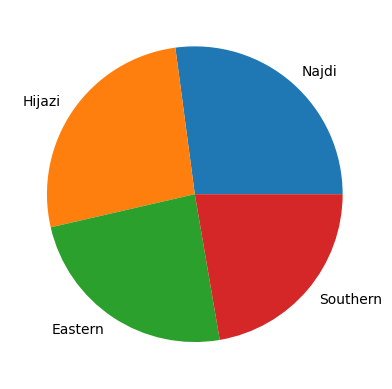

In [15]:
plt.pie(saudial_df['Dialect'].value_counts(), labels=saudial_df['Dialect'].value_counts().index)

In [16]:
print(saudial_df['Scenario'].value_counts()[:5])

Scenario
Traditional Celebration    43
Modern City Life           42
Ancient Ruins Discovery    41
Desert Adventure           40
Pilgrimage Preparation     36
Name: count, dtype: int64


In [17]:
print(saudial_df['Tone'].value_counts()[:5])

Tone
Reflective    224
Excited       176
Serious       159
Humorous       94
Mysterious     84
Name: count, dtype: int64


Aside from the MSA, English, and dialect translations, I think the context clues and dialect notes are useful for the model. The in-game context might also be useful. Otherwise, I think we'll discard the remainder of the data. The dialect is also too detailed info for the model, since it's trying to get to a general Saudi tone and not a local dialect.

In [18]:
saudial_df.columns.to_list()

['Dialect',
 'Scenario',
 'Game Type',
 'Tone',
 'Age Rating',
 'English Text',
 'Modern Standard Arabic (MSA) Translation',
 'Dialect Translation',
 'Context and Rating',
 'Dialect Notes',
 'Localization Difficulty',
 'In-Game Context']

In [19]:
clean_saudial_df = saudial_df.drop(['Dialect', 'Scenario', 'Game Type', 'Tone', 'Age Rating', 'Localization Difficulty'], axis = 1)

In [20]:
clean_saudial_df.head()

,English Text,Modern Standard Arabic (MSA) Translation,Dialect Translation,Context and Rating,Dialect Notes,In-Game Context
0,"""Rev up your engines! Today's race takes you t...","""شغلوا محركاتكم! سباق اليوم يأخذكم عبر طرق الت...","""قوّوا مكاينكم! سباق اليوم بياخذكم على دروب ال...",This dialogue combines traditional settings wi...,"""بياخذكم"" is used for ""takes you"", and ""دروب"" ...",Player participating in a high-tech desert rac...
1,"""You're trapped on the 300th floor of Jeddah T...","""أنت محاصر في الطابق الثلاثمائة من برج جدة. حل...","""انت محبوس في الدور الـ300 من برج جدة. حل الأل...",This dialogue mixes modern architecture with t...,"""محبوس"" is used for ""trapped"", and ""بينزلوا"" f...",Player solving puzzles to escape from a futuri...
2,"""Grandpa says, 'A well-built dhow can weather ...","""يقول جدي: 'السفينة المبنية جيدًا يمكنها مواجه...","""جدي يقول: 'البوم المضبوط يقدر يواجه أي نوة.' ...",This dialogue teaches traditional boat-buildin...,"""مضبوط"" is used for ""well-built"", and ""نوة"" fo...",Player learning to build a traditional dhow boat.
3,"""The rains are coming early this year. We need...","""الأمطار تأتي مبكرًا هذا العام. نحتاج إلى تقوي...","""المطر جاي بدري السنة. لازم نقوي المساطب ونزرع...",This dialogue addresses climate change adaptat...,"""مساطب"" is used for terraces, and ""بنتأقلم"" fo...",Player managing a traditional mountain farm fa...
4,"""Welcome to the Royal Camel Beauty Pageant! Ju...","""مرحبًا بكم في مسابقة جمال الإبل الملكية! احكم...","""حياكم في مسابقة زين الهجن الملكية! حكموا على ...",This humorous dialogue plays on traditional ca...,"""زين"" is used for beauty, and ""غوارب"" for hump...",Player judging a humorous camel beauty contest.


In [21]:
clean_saudial_df.duplicated().sum()

np.int64(3)

In [22]:
clean_saudial_df.drop_duplicates(inplace=True)

In [24]:
clean_saudial_df.isna().sum()

,0
English Text,0
Modern Standard Arabic (MSA) Translation,0
Dialect Translation,0
Context and Rating,0
Dialect Notes,0
In-Game Context,1


In [25]:
clean_saudial_df.dropna(inplace=True)

Upon inspection of the data, we notice two things:
- We need to remove the dialogue quotations in the EN/MSA/DA versions.
- In the dialect notes, while the explanations for each word is helpful, we'll remove the last part about a term being common in a certain region. So, anything past the last comma.

In [26]:
def remove_quotes(df):
    df = df.copy()
    quote_pattern = r'^"(.*)"$'
    for col in ["English Text", "Modern Standard Arabic (MSA) Translation", "Dialect Translation"]:
      if col in df.columns:
          df[col] = df[col].astype(str).str.strip()  # make sure it is a string
          df[col] = df[col].str.replace(quote_pattern, r'\1', regex=True)

    return df.reset_index(drop=True)

In [28]:
def trim_dialect_notes(df):
    df = df.copy()
    if "Dialect Notes" in df.columns:
        df["Dialect Notes"] = df["Dialect Notes"].astype(str).str.strip()
        df["Dialect Notes"] = df["Dialect Notes"].str.replace(r',[^,]*$', '', regex=True)

    return df.reset_index(drop=True)

In [32]:
clean_saudial_df = remove_quotes(clean_saudial_df)
clean_saudial_df = trim_dialect_notes(clean_saudial_df)

In [34]:
clean_saudial_df.iloc[0]

,0
English Text,Rev up your engines! Today's race takes you th...
Modern Standard Arabic (MSA) Translation,شغلوا محركاتكم! سباق اليوم يأخذكم عبر طرق التج...
Dialect Translation,قوّوا مكاينكم! سباق اليوم بياخذكم على دروب الت...
Context and Rating,This dialogue combines traditional settings wi...
Dialect Notes,"""بياخذكم"" is used for ""takes you"", and ""دروب"" ..."
In-Game Context,Player participating in a high-tech desert rac...


In [35]:
clean_saudial_df['Dialect Notes'][0]

'"بياخذكم" is used for "takes you", and "دروب" for "routes"'

In [36]:
clean_saudial_df.to_csv("clean_saudial_df.csv", index=False, encoding="utf-8-sig")

# Maknuune: Palestinian Lexicon

In [51]:
maknune_df = pd.read_csv("/content/content/drive/MyDrive/amiya_dataset/Palestinian/Maknuune/maknuune-v1.0.1/maknuune-v1.0.1.tsv", sep="\t")

maknune_df.head()

,ID,ROOT,ROOT_NTWS,ROOT_1,LEMMA,LEMMA_SEARCH,FORM,LEMMA_BW,FORM_BW,CAPHI++,ANALYSIS,GLOSS,GLOSS_MSA,EXAMPLE_USAGE,NOTES,SOURCE,ANNOTATOR
0,1,ء.ب.د,NaN,ء,أَبَد,أبد,أَبَد,>abad,>abad,2 a b a d,NOUN:MS,eternity;forever,NaN,NaN,NaN,NaN,شهد دعباس
1,2,ء.ب.ر,NaN,ء,إِبْرِة,إبرة,إِبْرِة,<iborip,<iborip,2 i b r e,NOUN:FS,needle;injection,إِبْرَة#حُقْنَة,في إِبْرِة وقعت تحت الكنب دير بالك.#أخذت ابرة ...,NaN,NaN,شهد دعباس
2,3,ء.ب.ر,NaN,ء,إِبْرِة,إبرة,إِبَر,<iborip,<ibar,2 i b a r,NOUN:P,needle;injection_[auto],NaN,بموت رعبة من الإِبَر أنا وأحيانا بغوطن بس أشوف...,NaN,NaN,شهد دعباس
3,4,ء.ب.ر,NaN,ء,إِبْرِة,إبرة,قَدّ خُرُم الإِبْرِة,<iborip,qad~ xurum Al<iborip,Q a d d # kh u r u m # 2 i l 2 i b r e,NOUN:PHRASE,very_small;tiny,صغير جدا,ابنك خَزَق الورقة خزُق قَد خُرْم الإِبْرِة,NaN,NaN,شهد دعباس
4,5,ء.ب.ر,NaN,ء,إِبْرِة,إبرة,إِبْرِة العَجُوزِة,<iborip,<iborip AlEajuwzip,2 i b r i t i l # 3 a J uu z e,NOUN:PHRASE,It_is_a_traditional_dish_that_is_made_of_Astra...,"إِنه طبق تقليدي مصنوع من نبات ""القتاد الماعزي""...",بقت إِمي الله يرحمها تحوسلنا عالغدا إِبْرِة ال...,cultural/food,NaN,شهد دعباس


In [52]:
maknune_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36302 entries, 0 to 36301
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             36302 non-null  int64 
 1   ROOT           36302 non-null  object
 2   ROOT_NTWS      897 non-null    object
 3   ROOT_1         36302 non-null  object
 4   LEMMA          36302 non-null  object
 5   LEMMA_SEARCH   36302 non-null  object
 6   FORM           36302 non-null  object
 7   LEMMA_BW       36302 non-null  object
 8   FORM_BW        36302 non-null  object
 9   CAPHI++        36302 non-null  object
 10  ANALYSIS       36302 non-null  object
 11  GLOSS          36302 non-null  object
 12  GLOSS_MSA      11905 non-null  object
 13  EXAMPLE_USAGE  18140 non-null  object
 14  NOTES          1365 non-null   object
 15  SOURCE         830 non-null    object
 16  ANNOTATOR      36302 non-null  object
dtypes: int64(1), object(16)
memory usage: 4.7+ MB


In [53]:
maknune_df.isna().sum() / len(maknune_df) * 100

,0
ID,0.000000
ROOT,0.000000
ROOT_NTWS,97.529062
ROOT_1,0.000000
LEMMA,0.000000
LEMMA_SEARCH,0.000000
FORM,0.000000
LEMMA_BW,0.000000
FORM_BW,0.000000
CAPHI++,0.000000


Right away, we'll eliminate the notes, source, root_ntws and annotator columns.

In [54]:
clean_maknune_df = maknune_df.drop(['NOTES', 'SOURCE', 'ROOT_NTWS', 'ANNOTATOR'], axis = 1)

Some issues already arise: realistically, we need the MSA / English / Palestinian glosses, and ideally the example. However, there's inconsistency in which rows have each of the MSA / example sentences. If we find how many rows have ALL of them:

In [55]:
temp_maknune = clean_maknune_df.dropna()

In [56]:
temp_maknune.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7665 entries, 1 to 36297
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             7665 non-null   int64 
 1   ROOT           7665 non-null   object
 2   ROOT_1         7665 non-null   object
 3   LEMMA          7665 non-null   object
 4   LEMMA_SEARCH   7665 non-null   object
 5   FORM           7665 non-null   object
 6   LEMMA_BW       7665 non-null   object
 7   FORM_BW        7665 non-null   object
 8   CAPHI++        7665 non-null   object
 9   ANALYSIS       7665 non-null   object
 10  GLOSS          7665 non-null   object
 11  GLOSS_MSA      7665 non-null   object
 12  EXAMPLE_USAGE  7665 non-null   object
dtypes: int64(1), object(12)
memory usage: 838.4+ KB


A significant drop from the original 36k entries. So, do we consider filling in these values? Or, upon instruction tuning, do we consider them optional?

For the POS analysis, we do the following:
- For POS tagging, we consult the CaMeL docs: https://camel-guidelines.readthedocs.io/en/latest/morphology/ to build the POS -> POS Arabic dictionary.

- For post-POS tags, we create a separate dictionary for identifying the letters on the following order: \<POS\>.\<A\>\<P\>\<G\>\<N\>.\<S\>\<C\>\<V\>\<M\> and using:
1. **A**spect with the values Perfective, Imperfective and Command.
2. **P**erson with the values 1st, 2nd, 3rd.
3. **G**ender with values Masculine and Feminine.
3. **N**umber with values Simgular, Dual and Plural.
4. **S**tate with values Definite, Indefinite and Construct.
5. **C**ase with values Nominative, Genitive and Accusative.
6. **V**oice with values Active and Passive.
7. **M**ood with values Subjunctive, Indicative and Jussive.

In [57]:
print(clean_maknune_df['ANALYSIS'].value_counts())

ANALYSIS
VERB:I          6384
VERB:C          6368
VERB:P          6230
NOUN:MS         4208
NOUN:FS         3071
                ... 
NOUN_PASS:MS       1
PRON:FP            1
PRON_DEM:3FS       1
PRON_DEM:3FP       1
PART_VOC           1
Name: count, Length: 101, dtype: int64


In [58]:
clean_maknune_df[clean_maknune_df['ANALYSIS'] == 'PRON:MS']

,ID,ROOT,ROOT_1,LEMMA,LEMMA_SEARCH,FORM,LEMMA_BW,FORM_BW,CAPHI++,ANALYSIS,GLOSS,GLOSS_MSA,EXAMPLE_USAGE
34726,34727,NTWS,ه,هُو,هو,هُو,huw,huw,h uu,PRON:MS,he,هُو,أنو اللي قالك انه هو اللي بده؟
34727,34728,NTWS,ه,هُوَّا,هوا,هُوَّا,huw~aA,huw~aA,h u w w a,PRON:MS,he,هُو,NaN
34728,34729,NTWS,ه,هُوَّي,هوي,هُوَّي,huw~ay,huw~ay,h uu w w e,PRON:MS,he,هُو,NaN


In [59]:
clean_maknune_df['ANALYSIS'].value_counts().to_csv("analysis_counts.csv")

In [60]:
clean_maknune_df.head()

,ID,ROOT,ROOT_1,LEMMA,LEMMA_SEARCH,FORM,LEMMA_BW,FORM_BW,CAPHI++,ANALYSIS,GLOSS,GLOSS_MSA,EXAMPLE_USAGE
0,1,ء.ب.د,ء,أَبَد,أبد,أَبَد,>abad,>abad,2 a b a d,NOUN:MS,eternity;forever,NaN,NaN
1,2,ء.ب.ر,ء,إِبْرِة,إبرة,إِبْرِة,<iborip,<iborip,2 i b r e,NOUN:FS,needle;injection,إِبْرَة#حُقْنَة,في إِبْرِة وقعت تحت الكنب دير بالك.#أخذت ابرة ...
2,3,ء.ب.ر,ء,إِبْرِة,إبرة,إِبَر,<iborip,<ibar,2 i b a r,NOUN:P,needle;injection_[auto],NaN,بموت رعبة من الإِبَر أنا وأحيانا بغوطن بس أشوف...
3,4,ء.ب.ر,ء,إِبْرِة,إبرة,قَدّ خُرُم الإِبْرِة,<iborip,qad~ xurum Al<iborip,Q a d d # kh u r u m # 2 i l 2 i b r e,NOUN:PHRASE,very_small;tiny,صغير جدا,ابنك خَزَق الورقة خزُق قَد خُرْم الإِبْرِة
4,5,ء.ب.ر,ء,إِبْرِة,إبرة,إِبْرِة العَجُوزِة,<iborip,<iborip AlEajuwzip,2 i b r i t i l # 3 a J uu z e,NOUN:PHRASE,It_is_a_traditional_dish_that_is_made_of_Astra...,"إِنه طبق تقليدي مصنوع من نبات ""القتاد الماعزي""...",بقت إِمي الله يرحمها تحوسلنا عالغدا إِبْرِة ال...


In [61]:
clean_maknune_df = clean_maknune_df.drop(['ID', 'ROOT', 'ROOT_1', 'LEMMA', 'LEMMA_SEARCH', 'LEMMA_BW', 'FORM_BW', 'CAPHI++'], axis = 1)

In [62]:
clean_maknune_df.head()

,FORM,ANALYSIS,GLOSS,GLOSS_MSA,EXAMPLE_USAGE
0,أَبَد,NOUN:MS,eternity;forever,NaN,NaN
1,إِبْرِة,NOUN:FS,needle;injection,إِبْرَة#حُقْنَة,في إِبْرِة وقعت تحت الكنب دير بالك.#أخذت ابرة ...
2,إِبَر,NOUN:P,needle;injection_[auto],NaN,بموت رعبة من الإِبَر أنا وأحيانا بغوطن بس أشوف...
3,قَدّ خُرُم الإِبْرِة,NOUN:PHRASE,very_small;tiny,صغير جدا,ابنك خَزَق الورقة خزُق قَد خُرْم الإِبْرِة
4,إِبْرِة العَجُوزِة,NOUN:PHRASE,It_is_a_traditional_dish_that_is_made_of_Astra...,"إِنه طبق تقليدي مصنوع من نبات ""القتاد الماعزي""...",بقت إِمي الله يرحمها تحوسلنا عالغدا إِبْرِة ال...


In [63]:
clean_maknune_df.to_csv("clean_maknune_df.csv", index=False)

In [64]:
analysis_dict = pd.read_excel("analysis_exp.xlsx")

In [65]:
analysis_dict.head()

,ANALYSIS,Pre (AR),Post (EN),Pre (EN),Post (AR)
0,VERB:C,فعل,Command,Verb,أمر
1,NOUN:D,اسم,Dual,Noun,مثنى
2,NOUN:FP,اسم,Feminine Plural,Noun,جمع مؤنث
3,PRON_DEM:FP,ضمير_إشارة,Feminine Plural,Demonstrative Pronoun,جمع مؤنث
4,PRON:FP,ضمير,Feminine Plural,Pronoun,جمع مؤنث


In [66]:
clean_maknune = clean_maknune_df.merge(
    analysis_dict,
    on='ANALYSIS',
    how='left'
)

In [67]:
clean_maknune.head()

,FORM,ANALYSIS,GLOSS,GLOSS_MSA,EXAMPLE_USAGE,Pre (AR),Post (EN),Pre (EN),Post (AR)
0,أَبَد,NOUN:MS,eternity;forever,NaN,NaN,اسم,Masculine Singular,Noun,مفرد مذكر
1,إِبْرِة,NOUN:FS,needle;injection,إِبْرَة#حُقْنَة,في إِبْرِة وقعت تحت الكنب دير بالك.#أخذت ابرة ...,اسم,Feminine Singular,Noun,مفرد مؤنث
2,إِبَر,NOUN:P,needle;injection_[auto],NaN,بموت رعبة من الإِبَر أنا وأحيانا بغوطن بس أشوف...,اسم,Plural,Noun,جمع
3,قَدّ خُرُم الإِبْرِة,NOUN:PHRASE,very_small;tiny,صغير جدا,ابنك خَزَق الورقة خزُق قَد خُرْم الإِبْرِة,اسم,Phrase,Noun,عبارة
4,إِبْرِة العَجُوزِة,NOUN:PHRASE,It_is_a_traditional_dish_that_is_made_of_Astra...,"إِنه طبق تقليدي مصنوع من نبات ""القتاد الماعزي""...",بقت إِمي الله يرحمها تحوسلنا عالغدا إِبْرِة ال...,اسم,Phrase,Noun,عبارة


In [68]:
clean_maknune = clean_maknune.drop(['ANALYSIS'], axis = 1)

In [69]:
clean_maknune['GLOSS'][15:20]

,GLOSS
15,It_is_an_idiomatic_expression_that_means_that_...
16,a_type_of_orange_in_Palestine_(Washington_nave...
17,stingy
18,"it_is_an_idiomatic_expression_that_means_""the_..."
19,"it_is_an_idiomatic_expression_that_means_""the_..."


We also need to clean the English Gloss text.

In [70]:
def clean_gloss(text):
    if pd.isna(text):
        return text
    text = text.replace("_", " ")
    text = text.replace("[", "")
    text = text.replace("]", "")
    text = text.strip()
    text = text.rstrip("...")
    return text

In [71]:
clean_maknune['GLOSS'] = clean_maknune['GLOSS'].apply(clean_gloss)

In [72]:
clean_maknune.head()

,FORM,GLOSS,GLOSS_MSA,EXAMPLE_USAGE,Pre (AR),Post (EN),Pre (EN),Post (AR)
0,أَبَد,eternity;forever,NaN,NaN,اسم,Masculine Singular,Noun,مفرد مذكر
1,إِبْرِة,needle;injection,إِبْرَة#حُقْنَة,في إِبْرِة وقعت تحت الكنب دير بالك.#أخذت ابرة ...,اسم,Feminine Singular,Noun,مفرد مؤنث
2,إِبَر,needle;injection auto,NaN,بموت رعبة من الإِبَر أنا وأحيانا بغوطن بس أشوف...,اسم,Plural,Noun,جمع
3,قَدّ خُرُم الإِبْرِة,very small;tiny,صغير جدا,ابنك خَزَق الورقة خزُق قَد خُرْم الإِبْرِة,اسم,Phrase,Noun,عبارة
4,إِبْرِة العَجُوزِة,It is a traditional dish that is made of Astra...,"إِنه طبق تقليدي مصنوع من نبات ""القتاد الماعزي""...",بقت إِمي الله يرحمها تحوسلنا عالغدا إِبْرِة ال...,اسم,Phrase,Noun,عبارة


In [75]:
clean_maknune.to_csv("clean_maknune.csv", index=False, encoding="utf-8-sig")

# EDGAD: Egyptian Dialect Gender Annotated Dataset

In [98]:
edgad_df = pd.read_csv("/content/drive/MyDrive/Datasets/Egyptian/EDGAD/tweets_ar_final.csv")

In [99]:
edgad_df.head()

,File,Date,Tweet,Language
0,1.txt,2014-04-11 20:58:46,هي ناقصة هم,ar
1,1.txt,2013-09-03 21:44:33,حوارات افري وير,ar
2,1.txt,2013-09-03 20:40:21,طيب و ايه الجديد,ar
3,1.txt,2013-09-03 20:40:05,التغيير مطلوب,ar
4,1.txt,2013-09-02 20:41:42,"فين أيام ما كانت أغنية ""أخاصمك آه"" اسفاف و ابت...",ar


In [100]:
edgad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203053 entries, 0 to 203052
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   File      203053 non-null  object
 1   Date      203053 non-null  object
 2   Tweet     203053 non-null  object
 3   Language  203053 non-null  object
dtypes: object(4)
memory usage: 6.2+ MB


In [101]:
edgad_df.iloc[123456]['Tweet']

'لا هي فعلاً مشكلة أننا مينفعش نمسح غلطة حد قالها/عملها، ومهما كنا واثقين في إنه مش هيكررها بنفضل نعامله بديفينس موود تحسباً لأي حركة غدر.'

Really not much to say here, we're simply going to keep the Tweet text. No bi-text, or context.

In [102]:
edgad_clean = pd.DataFrame(edgad_df['Tweet'])

In [103]:
edgad_clean.head()

,Tweet
0,هي ناقصة هم
1,حوارات افري وير
2,طيب و ايه الجديد
3,التغيير مطلوب
4,"فين أيام ما كانت أغنية ""أخاصمك آه"" اسفاف و ابت..."


We can see a lot of duplications, so we'll discard these.

In [104]:
edgad_clean.duplicated().sum()

np.int64(20613)

In [105]:
edgad_clean.drop_duplicates(inplace=True)

In [106]:
edgad_clean.isna().sum()

,0
Tweet,0


On examining, we see some sequences that need to be removed and are common in tweets:
1. Long numbers (i.e. Phone numbers)
2. Special characters (e.g. #, &) and odd characters
3. Remove lines that do NOT have any Arabic text
4. Check for NA values after

In [107]:
def clean_arabic_tweet(text):
    if not isinstance(text, str):
        return ""

    text = re.sub(r'\b\d{5,14}\b', '', text)
    text = re.sub(
        r"[^0-9A-Za-z\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF\s\.\,\!\؟\?]",
        " ",
        text
    )
    text = re.sub(r'\s+', ' ', text).strip()

    return text


def contains_arabic(text):
    return bool(re.search(r'[\u0600-\u06FF]', str(text)))

In [108]:
edgad_clean['Tweet'] = edgad_clean['Tweet'].apply(clean_arabic_tweet)
edgad_clean = edgad_clean[edgad_clean['Tweet'].apply(contains_arabic)]

edgad_clean = edgad_clean.reset_index(drop=True)

In [109]:
edgad_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182044 entries, 0 to 182043
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Tweet   182044 non-null  object
dtypes: object(1)
memory usage: 1.4+ MB


In [110]:
edgad_clean.duplicated().sum()

np.int64(735)

In [111]:
edgad_clean.drop_duplicates(inplace=True)

In [113]:
edgad_clean.to_csv("edgad_clean.csv", index = False, encoding="utf-8-sig")

# EDGAD : Male Set

In [ ]:
# TO-DO LATER

# UFAL

In [54]:
ufal_path = "/content/drive/MyDrive/Datasets/Syrian/UFAL/UFAL Parallel Corpus of North Levantine 1.0"

In [65]:
apc = ufal_path + '/ufal-nla-v1.apc'

ufal_df = pd.DataFrame(pd.read_csv(apc, sep='\r\n', header=None)[0])
ufal_df.columns = ['SYR']

/tmp/ipython-input-638511808.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ufal_df = pd.DataFrame(pd.read_csv(apc, sep='\r\n', header=None)[0])


In [66]:
ufal_df.head()

,SYR
0,خلونا نحكي عن الوقت اللي قدمت فيه مالدوفا لروم...
1,ضليتي بالعالم وقت كتير وإكتشفتي إنو مانتيكور م...
2,هيي شافيتون بالصدفة عوحدة من رحلاتون، يمكن
3,شو عم يعمل هالغبي؟
4,نحنا بمحلنا وجاهزين للإعتراض


In [67]:
ufal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120600 entries, 0 to 120599
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   SYR     120600 non-null  object
dtypes: object(1)
memory usage: 942.3+ KB


In [68]:
ar = ufal_path + '/ufal-nla-v1.arb'

ar_col = pd.Series(pd.read_csv(ar, sep='\r\n', header=None)[0])

/tmp/ipython-input-4123227078.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ar_col = pd.Series(pd.read_csv(ar, sep='\r\n', header=None)[0])


In [69]:
ar_col.head()

,0
0,دعونا نتحدّث عن الوقت الذي (قدّمت فيه (مالدوفا...
1,بقيت في العالم وقتاً طويلاً واكتشفتي ان مانتيك...
2,"هي إلتقت بهم بالصدفة على متن إحدى رحلاتهم, ربما"
3,مالذي يفعله هذا الأحمق؟
4,نحنُ فى موضعنا وجاهزون للإعتراض


In [70]:
ufal_df['MSA'] = ar_col

In [71]:
en = ufal_path + '/ufal-nla-v1.eng'

en_col = pd.Series(pd.read_csv(en, sep='\r\n', header=None)[0])

/tmp/ipython-input-514711803.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  en_col = pd.Series(pd.read_csv(en, sep='\r\n', header=None)[0])


In [72]:
ufal_df['EN'] = en_col

In [73]:
ufal_df.head()

,SYR,MSA,EN
0,خلونا نحكي عن الوقت اللي قدمت فيه مالدوفا لروم...,دعونا نتحدّث عن الوقت الذي (قدّمت فيه (مالدوفا...,Let's talk about the time Moldova made Romania...
1,ضليتي بالعالم وقت كتير وإكتشفتي إنو مانتيكور م...,بقيت في العالم وقتاً طويلاً واكتشفتي ان مانتيك...,"You stay out in the world long enough, you fin..."
2,هيي شافيتون بالصدفة عوحدة من رحلاتون، يمكن,"هي إلتقت بهم بالصدفة على متن إحدى رحلاتهم, ربما","If she bumped into one of them on a plane, she..."
3,شو عم يعمل هالغبي؟,مالذي يفعله هذا الأحمق؟,What's that idiot doing?
4,نحنا بمحلنا وجاهزين للإعتراض,نحنُ فى موضعنا وجاهزون للإعتراض,We're in position and ready to intercept.


In [74]:
ufal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120600 entries, 0 to 120599
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   SYR     120600 non-null  object
 1   MSA     120600 non-null  object
 2   EN      120600 non-null  object
dtypes: object(3)
memory usage: 2.8+ MB


For UFAL, we simply remove special characters and check for duplicates/NAs.

In [75]:
ufal_df.duplicated().sum()

np.int64(0)

In [76]:
ufal_df.isna().sum()

,0
SYR,0
MSA,0
EN,0


In [77]:
def remove_special(df):
  df = df.copy()
  cols = ['SYR', 'MSA', 'EN']

  for column in cols:
    if column in df.columns:
      allowed_chars = r"[^\w\d\s\.\,\!\?\¿\¡]"
      df[column] = df[column].astype(str)
      df[column] = df[column].str.replace(allowed_chars, ' ', regex=True)
      df[column] = df[column].str.replace(r'\s+', ' ', regex=True).str.strip()

      df[column] = df[column].replace(['', ' ', None], pd.NA)
      df = df.dropna(subset=[column]).reset_index(drop=True)


  return df.reset_index(drop=True)

In [78]:
ufal_df = remove_special(ufal_df)

In [79]:
ufal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120600 entries, 0 to 120599
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   SYR     120600 non-null  object
 1   MSA     120600 non-null  object
 2   EN      120600 non-null  object
dtypes: object(3)
memory usage: 2.8+ MB


In [80]:
ufal_df.to_csv("ufal_clean.csv", index = False, encoding="utf-8-sig")